Chapter 26  
# Kernel PCA
*Machine Learning Made Easy and Visual with Python*

##  Initialization 

In [3]:
from sklearn.datasets import make_circles  # For generating synthetic circular data
import matplotlib.pyplot as plt             # For visualization
import numpy as np                          # For numerical computations
import seaborn as sns                        # For heatmap visualization

##  Generate synthetic data 

In [5]:
# Create 2D circular data with some noise
X_original, y = make_circles(n_samples=200,  # number of samples
                             factor=0.3,      # scale factor between inner and outer circle
                             noise=0.05,      # Gaussian noise
                             random_state=0)  # ensure reproducibility

In [6]:
X_original.shape  # Check the shape of the data

(200, 2)

##  Visualize original data 

Text(0, 0.5, 'Original feature 2')

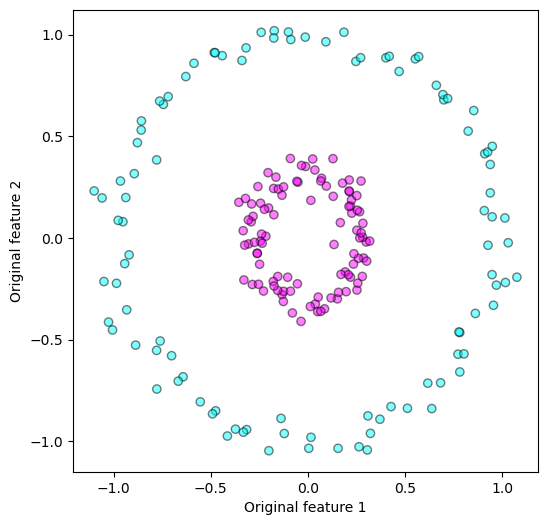

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
# Scatter plot colored by class label
ax.scatter(X_original[:, 0], X_original[:, 1], 
           c=y, cmap='cool', 
           edgecolors=['k'], alpha=0.5)
ax.set_xlabel("Original feature 1")
ax.set_ylabel("Original feature 2")

##  Standardize features 

In [10]:
from sklearn.preprocessing import StandardScaler
# Standardize features to zero mean and unit variance
X = StandardScaler().fit_transform(X_original)

Text(0, 0.5, 'STD feature 2')

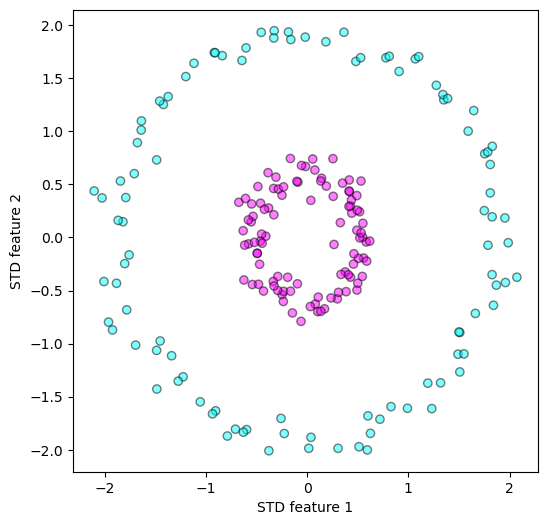

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
# Scatter plot of standardized data
ax.scatter(X[:, 0], X[:, 1], 
           c=y, cmap='cool', 
           edgecolors=['k'], alpha=0.5)
ax.set_xlabel("STD feature 1")
ax.set_ylabel("STD feature 2")

##  Compute pairwise Euclidean distance matrix 

In [13]:
from sklearn.metrics.pairwise import euclidean_distances

In [14]:
# Squared Euclidean distance for all pairs
dist = euclidean_distances(X, X, squared=True)

<Axes: >

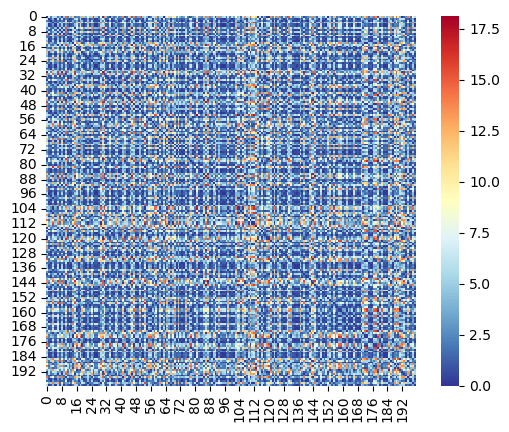

In [15]:
# Heatmap of distances
sns.heatmap(dist, square=True, cmap='RdYlBu_r')

In [16]:
dist.shape  # Shape of the distance matrix

(200, 200)

##  Compute RBF kernel matrix 

In [18]:
gamma = 1  # Kernel parameter (needs tuning)
# Gaussian (RBF) kernel: K(x_i, x_j) = exp(-gamma * ||x_i - x_j||^2)
K = np.exp(-gamma * dist)

In [19]:
K.shape  # Shape of kernel matrix

(200, 200)

<Axes: >

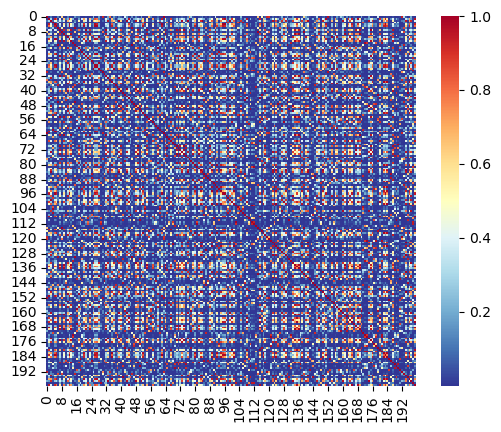

In [20]:
sns.heatmap(K, square=True, cmap='RdYlBu_r')  # Visualize kernel matrix

In [21]:
##  Center the kernel matrix 

In [22]:
from sklearn.preprocessing import KernelCenterer
# Manual centering of kernel matrix: Kc = M * K * M^T
n = len(K)
M = np.identity(n) - (1/n) * np.ones((n,n))
Kc = M @ K @ M.T

<Axes: >

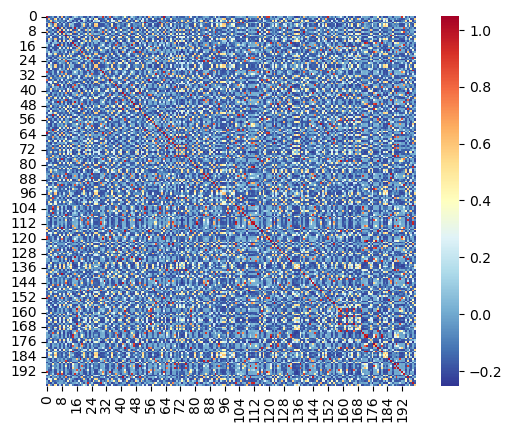

In [23]:
sns.heatmap(Kc, square=True, cmap='RdYlBu_r')  # Visualize centered kernel

##  Eigenvalue decomposition of centered kernel 

In [25]:
eig_vals, eig_vecs = np.linalg.eigh(Kc)  # Compute eigenvalues and eigenvectors
# Sort eigenvalues in descending order
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

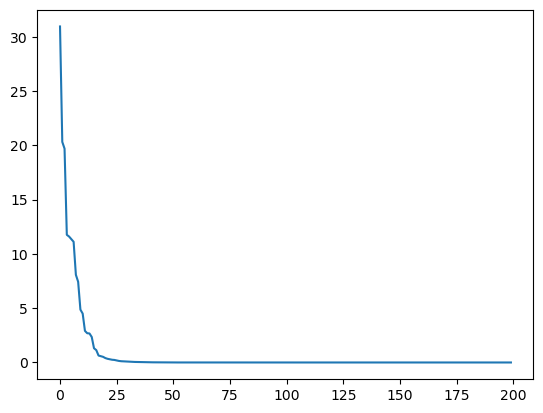

In [26]:
plt.plot(eig_vals)  # Scree plot of eigenvalues

##  Extract first two principal components 

In [28]:
num_PCs = 2
Xpca = eig_vecs[:, :num_PCs]  # Take top 2 eigenvectors

In [29]:
eig_vals[:2]  # Top 2 eigenvalues
Xpca.shape    # Shape of principal components

(200, 2)

Text(0, 0.5, 'PC2')

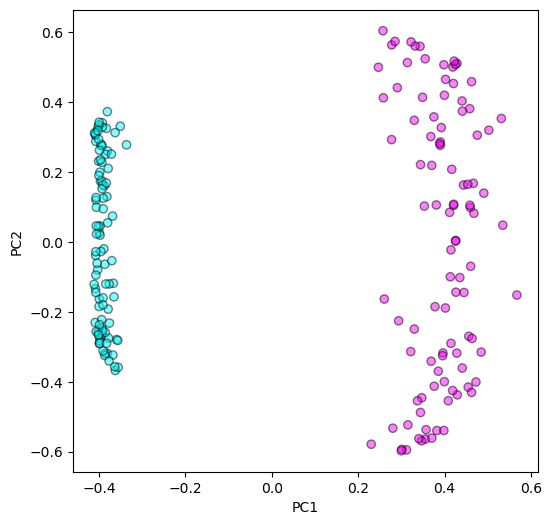

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
# Scatter plot of first two kernel principal components
ax.scatter(Xpca[:, 0] * np.sqrt(eig_vals[0]), Xpca[:, 1] * np.sqrt(eig_vals[1]), 
           c=y, cmap='cool', 
           edgecolors=['k'], alpha=0.5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

##  Kernel PCA using Scikit-Learn 

In [32]:
from sklearn.decomposition import KernelPCA

In [33]:
# Use RBF kernel with gamma=1
SK_PCA = KernelPCA(n_components=2, kernel='rbf', gamma=1)
SK_PC_X = SK_PCA.fit_transform(X)

Text(0, 0.5, 'PC2')

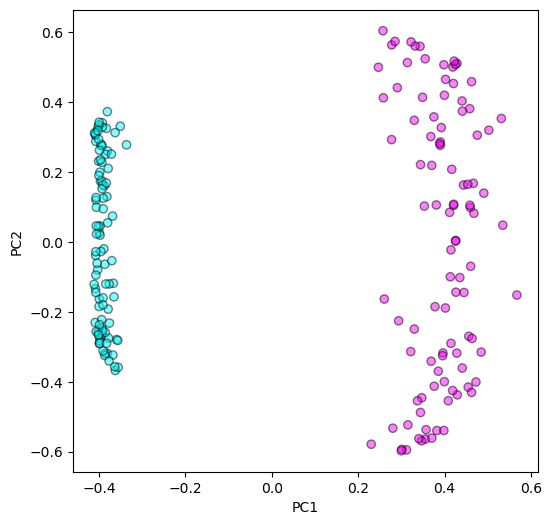

In [34]:
fig, ax = plt.subplots(figsize=(6,6))
# Scatter plot of first two components from scikit-learn KernelPCA
ax.scatter(SK_PC_X[:, 0], SK_PC_X[:, 1], 
           c=y, cmap='cool', 
           edgecolors=['k'], alpha=0.5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")